In [1]:
!pip install flammkuchen

In [2]:
!pip install numpy

In [3]:
!pip install opencv-python

In [4]:
!pip install albumentations

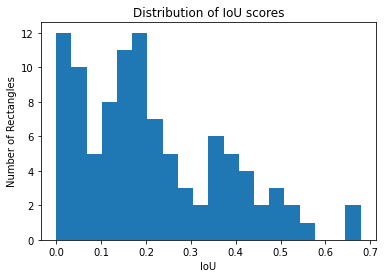

In [5]:
import flammkuchen as fl
import numpy as np
import matplotlib.pyplot as plt

# Define the IoU calculation function
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    
    # Calculate coordinates of intersection rectangle
    x_left = max(x1, x2)
    y_top = max(y1, y2)
    x_right = min(x1 + w1, x2 + w2)
    y_bottom = min(y1 + h1, y2 + h2)
    
    # Calculate area of intersection rectangle
    intersection_area = max(0, x_right - x_left) * max(0, y_bottom - y_top)
    
    # Calculate areas of both rectangles
    area1 = w1 * h1
    area2 = w2 * h2
    
    # Calculate Union area
    union_area = area1 + area2 - intersection_area
    
    # Calculate IoU
    iou = intersection_area / union_area if union_area > 0 else 0
    return iou

# Load rectangles from the file
file_path = 'rectanglesdsss.sec'
# Load rectangles from the file
data = fl.load(file_path)
ground_truth_rectangles = data['ground_truth']
predicted_rectangles = data['predicted']


# Calculate IoU scores for each pair of rectangles
iou_scores = []
for i in range(len(ground_truth_rectangles)):
    iou = calculate_iou(ground_truth_rectangles[i], predicted_rectangles[i])
    iou_scores.append(iou)

# Plot histogram of IoU scores
plt.hist(iou_scores, bins=20)
plt.xlabel('IoU')
plt.ylabel('Number of Rectangles')
plt.title('Distribution of IoU scores')
plt.show()

In [6]:
import os
import numpy as np
np.random.seed(23080433)

# Assuming you have lists of file paths for images and masks
images_dir = 'Mini_BAGLS_dataset'  # Replace with your directory path containing images
masks_dir = 'Mini_BAGLS_dataset'    # Replace with your directory path containing masks

image_filenames = os.listdir(images_dir)
mask_filenames = os.listdir(masks_dir)

# Randomly select an image and its mask
random_image_filename = np.random.choice(image_filenames)
random_mask_filename = random_image_filename.replace('.png', '_seg.png')  # Assuming mask filenames are similar with '_mask'

random_image_path = os.path.join(images_dir, random_image_filename)
random_mask_path = os.path.join(masks_dir, random_mask_filename)



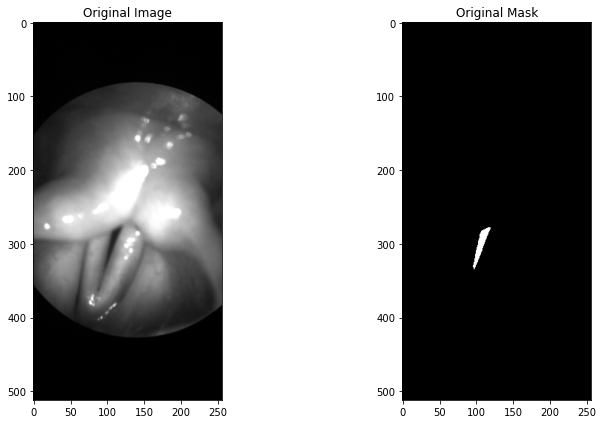

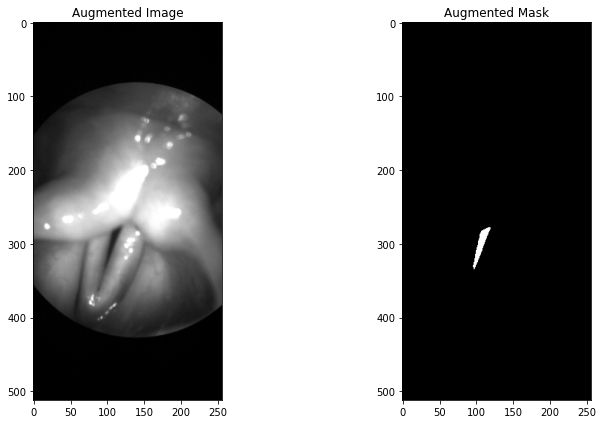

In [11]:
#import cv2
import imageio.v3 as io
import albumentations as A

# Load the image and mask using OpenCV (or any other library you prefer)
image = io.imread(random_image_path)
mask = io.imread(random_mask_path)

# Define augmentation pipeline
transform = A.Compose([
    A.Rotate(limit=30, p=0.5),  # Random rotation with a limit of 30 degrees
    A.RandomBrightnessContrast(p=0.5),  # Random changes in brightness and contrast
    # Add more augmentation techniques as needed
], p=1)

# Apply transformations to image and mask
augmented = transform(image=image, mask=mask)
augmented_image = augmented['image']
augmented_mask = augmented['mask']

# Display original and augmented images side by side
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Display original image and mask
axes[0].imshow(image)
axes[0].set_title('Original Image')
#axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Original Mask')
#axes[1].axis('off')

plt.tight_layout()
plt.show()

# Display augmented image and mask
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].imshow(augmented_image)
axes[0].set_title('Augmented Image')
#axes[0].axis('off')

axes[1].imshow(augmented_mask, cmap='gray')
axes[1].set_title('Augmented Mask')
#axes[1].axis('off')

plt.tight_layout()
plt.show()

In [8]:
!pip install albumentations

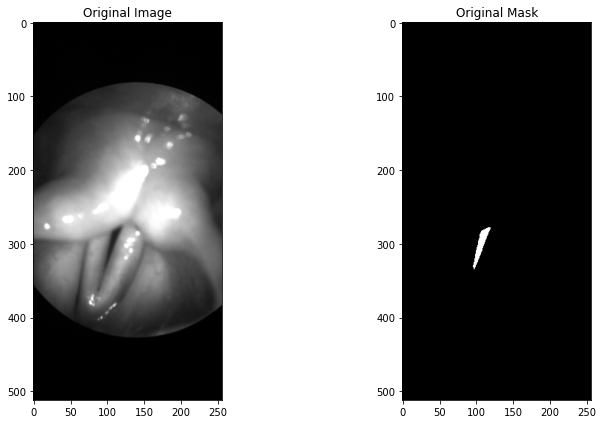

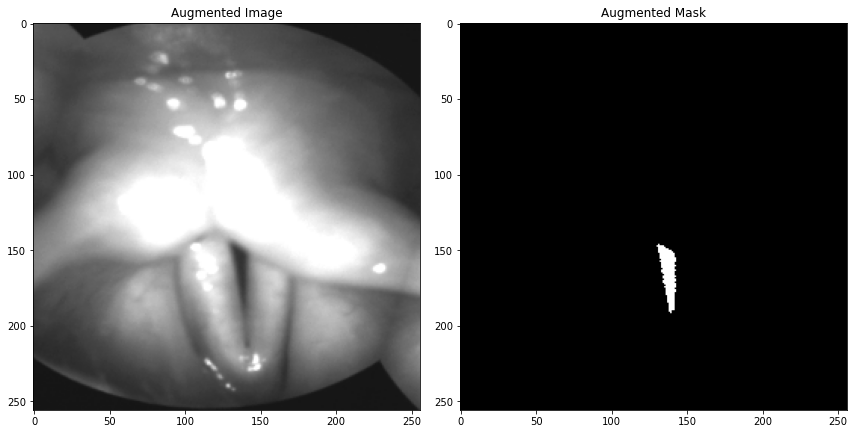

In [12]:
#import cv2
import imageio.v3 as io
import albumentations as A

# Load the image and mask using OpenCV (or any other library you prefer)
image = io.imread(random_image_path)
mask = io.imread(random_mask_path)

transform = A.Compose([
    A.Rotate(limit=30, p=0.5),  # Random rotation with a limit of 30 degrees
    A.RandomBrightnessContrast(p=0.5),  # Random changes in brightness and contrast
    A.HorizontalFlip(p=0.5),  # Horizontal flip with a probability of 0.5
    A.RandomResizedCrop(256, 256, scale=(0.8, 1.0), p=0.5),  # Random resized crop
    A.RandomGamma(p=0.5),  # Random gamma correction
    # Add more augmentation techniques as needed
], p=1)

# Apply transformations to image and mask
augmented = transform(image=image, mask=mask)
augmented_image = augmented['image']
augmented_mask = augmented['mask']

# Display original and augmented images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display original image and mask
axes[0].imshow(image)
axes[0].set_title('Original Image')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Original Mask')

plt.tight_layout()
plt.show()

# Display augmented image and mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(augmented_image)
axes[0].set_title('Augmented Image')

axes[1].imshow(augmented_mask, cmap='gray')
axes[1].set_title('Augmented Mask')

plt.tight_layout()
plt.show()

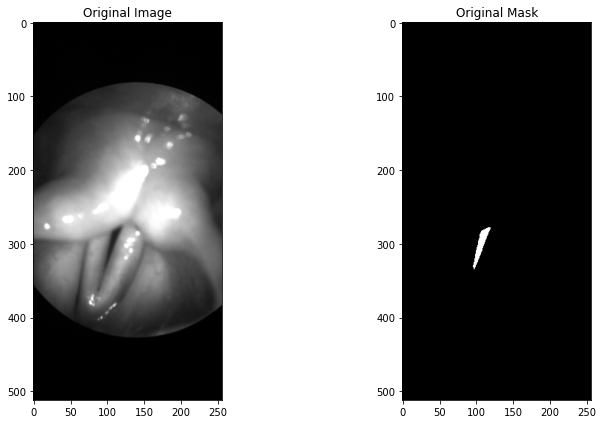

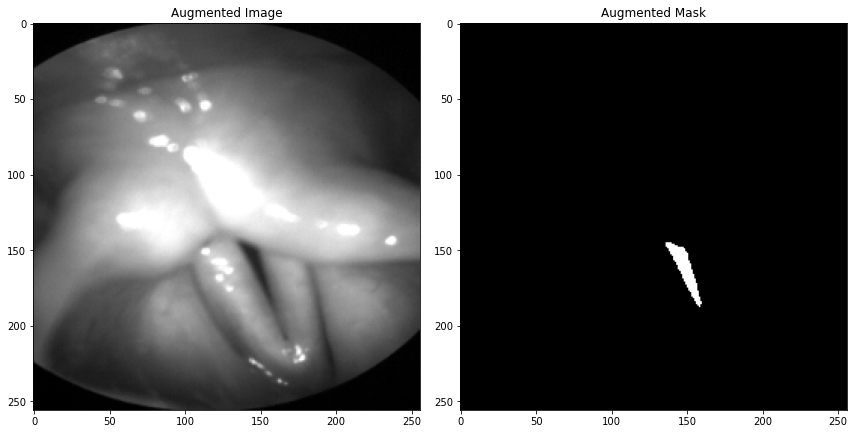

In [14]:
#import cv2
import imageio.v3 as io
import albumentations as A

# Load the image and mask using OpenCV (or any other library you prefer)
image = io.imread(random_image_path)
mask = io.imread(random_mask_path)

# Define augmentation pipeline
transform = A.Compose([
    A.Rotate(limit=40, p=0.5),                   # Random rotation with a limit of 30 degrees
    A.RandomBrightnessContrast(p=0.5),           # Random changes in brightness and contrast
    A.HorizontalFlip(p=0.5),
    A.RandomResizedCrop(256, 256, scale=(0.8, 1), p=0.5),  # Random resized crop
    A.RandomGamma(p=0.5),                        # Random gamma correction
    A.Blur(blur_limit=3, p=0.5),                 # Random blur
    A.OpticalDistortion(p=0.5),                  # Optical distortion
    A.GridDistortion(p=0.5),                     # Grid distortion
    A.ElasticTransform(p=0.5),                   # Elastic transformation
    # Add more augmentation techniques as needed
], p=1)

# Apply transformations to image and mask
augmented = transform(image=image, mask=mask)
augmented_image = augmented['image']
augmented_mask = augmented['mask']

# Display original and augmented images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display original image and mask
axes[0].imshow(image)
axes[0].set_title('Original Image')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Original Mask')

plt.tight_layout()
plt.show()

# Display augmented image and mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(augmented_image)
axes[0].set_title('Augmented Image')

axes[1].imshow(augmented_mask, cmap='gray')
axes[1].set_title('Augmented Mask')

plt.tight_layout()
plt.show()